# Pima Indians Dataset

<img src="pima2.png">

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.  As such it is a classification problem. It is a good dataset for demonstration because all of the input attributes are numeric and the output variable to be predicted is binary (0 or 1).

__Objective__

We are going to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?
First step
- Looking at the dataset for the missing values
- data visualisation
- relationships between the attributes 
- feature engineering for machine learning
- models building

__Loading Modules__

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
sns.set() # setting seaborn default for plots
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
style_dict = {'background-color':'slategray',
              'color':'#37c9e1',
              'border-color': 'white',
              'font-family':'Roboto'}

In [247]:
# Machine learning 
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

__Loading Dataset__

In [248]:
data = pd.read_csv("diabetes.csv")

In [249]:
# View first 10 rows
data.head(10).style.set_properties(**style_dict)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0,0.232,54,1


__Data__

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- __Pregnancies__: Number of times pregnant
- __Glucose__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- __BloodPressure__: Diastolic blood pressure (mm Hg)
- __SkinThickness__: Triceps skin fold thickness (mm)
- __Insulin__: 2-Hour serum insulin (mu U/ml)
- __BMI__: Body mass index (weight in kg/(height in m)^2)
- __DiabetesPedigreeFunction__: Diabetes pedigree function
- __Age__: Age (years)
- __Outcome__: Class variable (0 or 1)

__Dimensions of Dataset__

In [250]:
data.shape

(768, 9)

__Descriptive Statistics__

Descriptive statistics into shape of each attribute, which  you can create more summaries than you have time to review.
The describe() function on the PandasvDataFrame lists 8 statistical properties of each attribute. They are:
- Count.
- Mean.
- Standard Deviation.
- Minimum Value.
- 25th Percentile.
- 50th Percentile (Median).
- 75th Percentile.
- Maximum Value

In [251]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0000000000,768.0000000000,768.0000000000,768.0000000000,768.0000000000,768.0000000000,768.0000000000,768.0000000000,768.0000000000
mean,3.8450520833,120.8945312500,69.1054687500,20.5364583333,79.7994791667,31.9925781250,0.4718763021,33.2408854167,0.3489583333
std,3.3695780627,31.9726181951,19.3558071706,15.9522175677,115.2440023513,7.8841603204,0.3313285950,11.7602315407,0.4769513772
min,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0780000000,21.0000000000,0.0000000000
25%,1.0000000000,99.0000000000,62.0000000000,0.0000000000,0.0000000000,27.3000000000,0.2437500000,24.0000000000,0.0000000000
50%,3.0000000000,117.0000000000,72.0000000000,23.0000000000,30.5000000000,32.0000000000,0.3725000000,29.0000000000,0.0000000000
75%,6.0000000000,140.2500000000,80.0000000000,32.0000000000,127.2500000000,36.6000000000,0.6262500000,41.0000000000,1.0000000000
max,17.0000000000,199.0000000000,122.0000000000,99.0000000000,846.0000000000,67.1000000000,2.4200000000,81.0000000000,1.0000000000


__Data Type For Each Attribute__

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No missing entries in dataset
all are integer, just BMI and DiabetesPedigreeFunction are float

In [21]:
data.groupby('Outcome').size()


Outcome
0    500
1    268
dtype: int64

You can see that there are nearly double the number of observations with class 0 (no onset
of diabetes) than there are with class 1 (onset of diabetes).

__Correlations Between Attributes__

In [24]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
data.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


Correlation refers to the relationship between two variables and how they may or may not
change together. 

As you can see we use the  method for calculating correlation is Pearson’s Correlation
Coefficient, that assumes a normal distribution of the attributes involved. A correlation of -1
or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no
correlation at all. Some machine learning algorithms like linear and logistic regression can suffer
poor performance if there are highly correlated attributes in your dataset. As such, it is a good
idea to review all of the pairwise correlations of the attributes in your dataset. You can use the
corr() function on the Pandas DataFrame to calculate a correlation matrix

__Skew of Univariate Distributions__

In [25]:
data.skew()

Pregnancies                 0.902
Glucose                     0.174
BloodPressure              -1.844
SkinThickness               0.109
Insulin                     2.272
BMI                        -0.429
DiabetesPedigreeFunction    1.920
Age                         1.130
Outcome                     0.635
dtype: float64

The skew result show a positive (right) or negative (left) skew. Values closer to zero show
less skew.

# Data Visualization

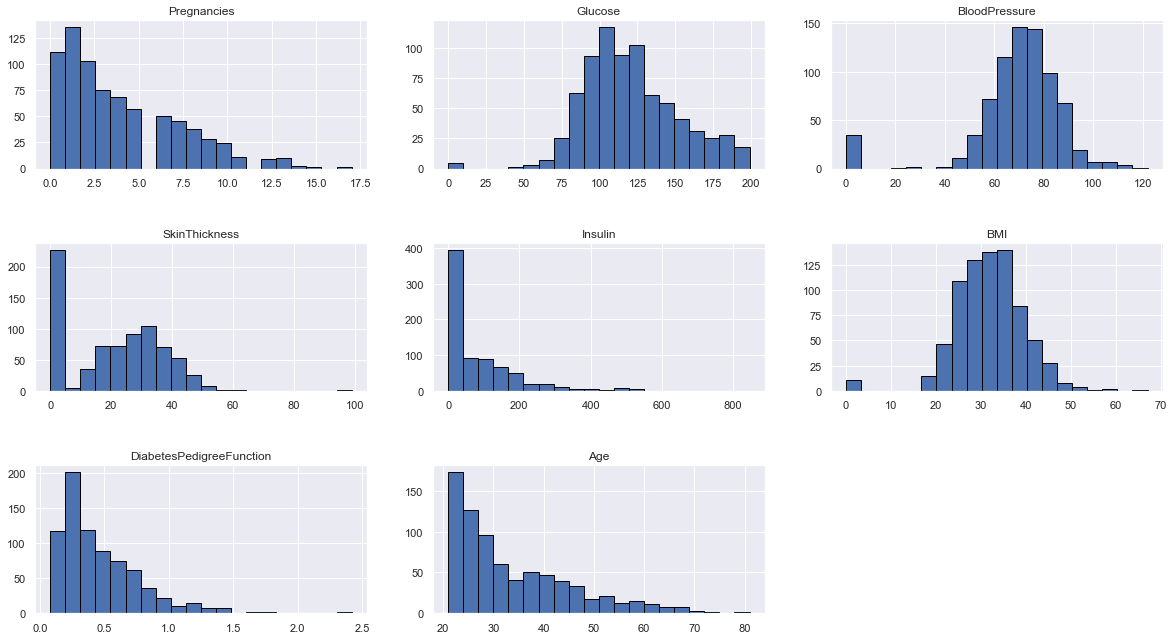

In [80]:
from matplotlib import pyplot
columns=data.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

We can see that perhaps the attributes age, pedi and test may have an exponential
distribution. We can also see that perhaps the mass and pres and plas attributes may have a
Gaussian or nearly Gaussian distribution. This is interesting because many machine learning
techniques assume a Gaussian univariate distribution on the input variables

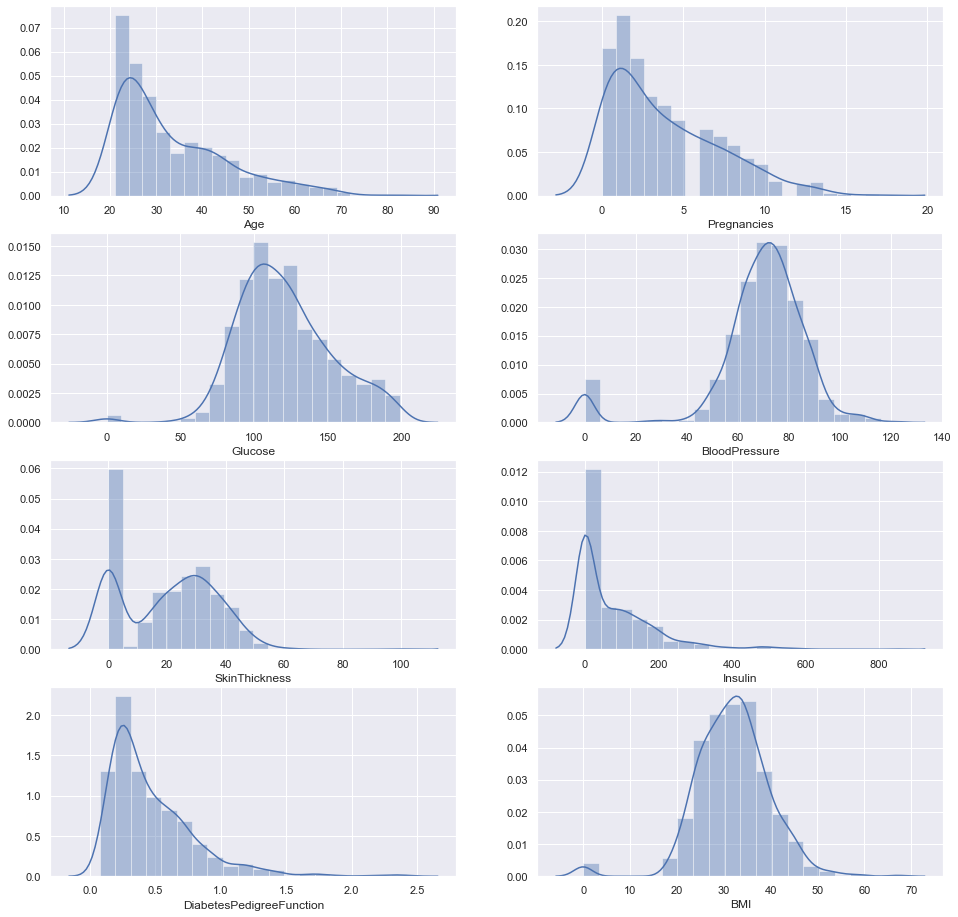

In [66]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(data.BMI, bins = 20, ax=ax[3,1]) 

We can see the distribution for each attribute is clearer than the histograms

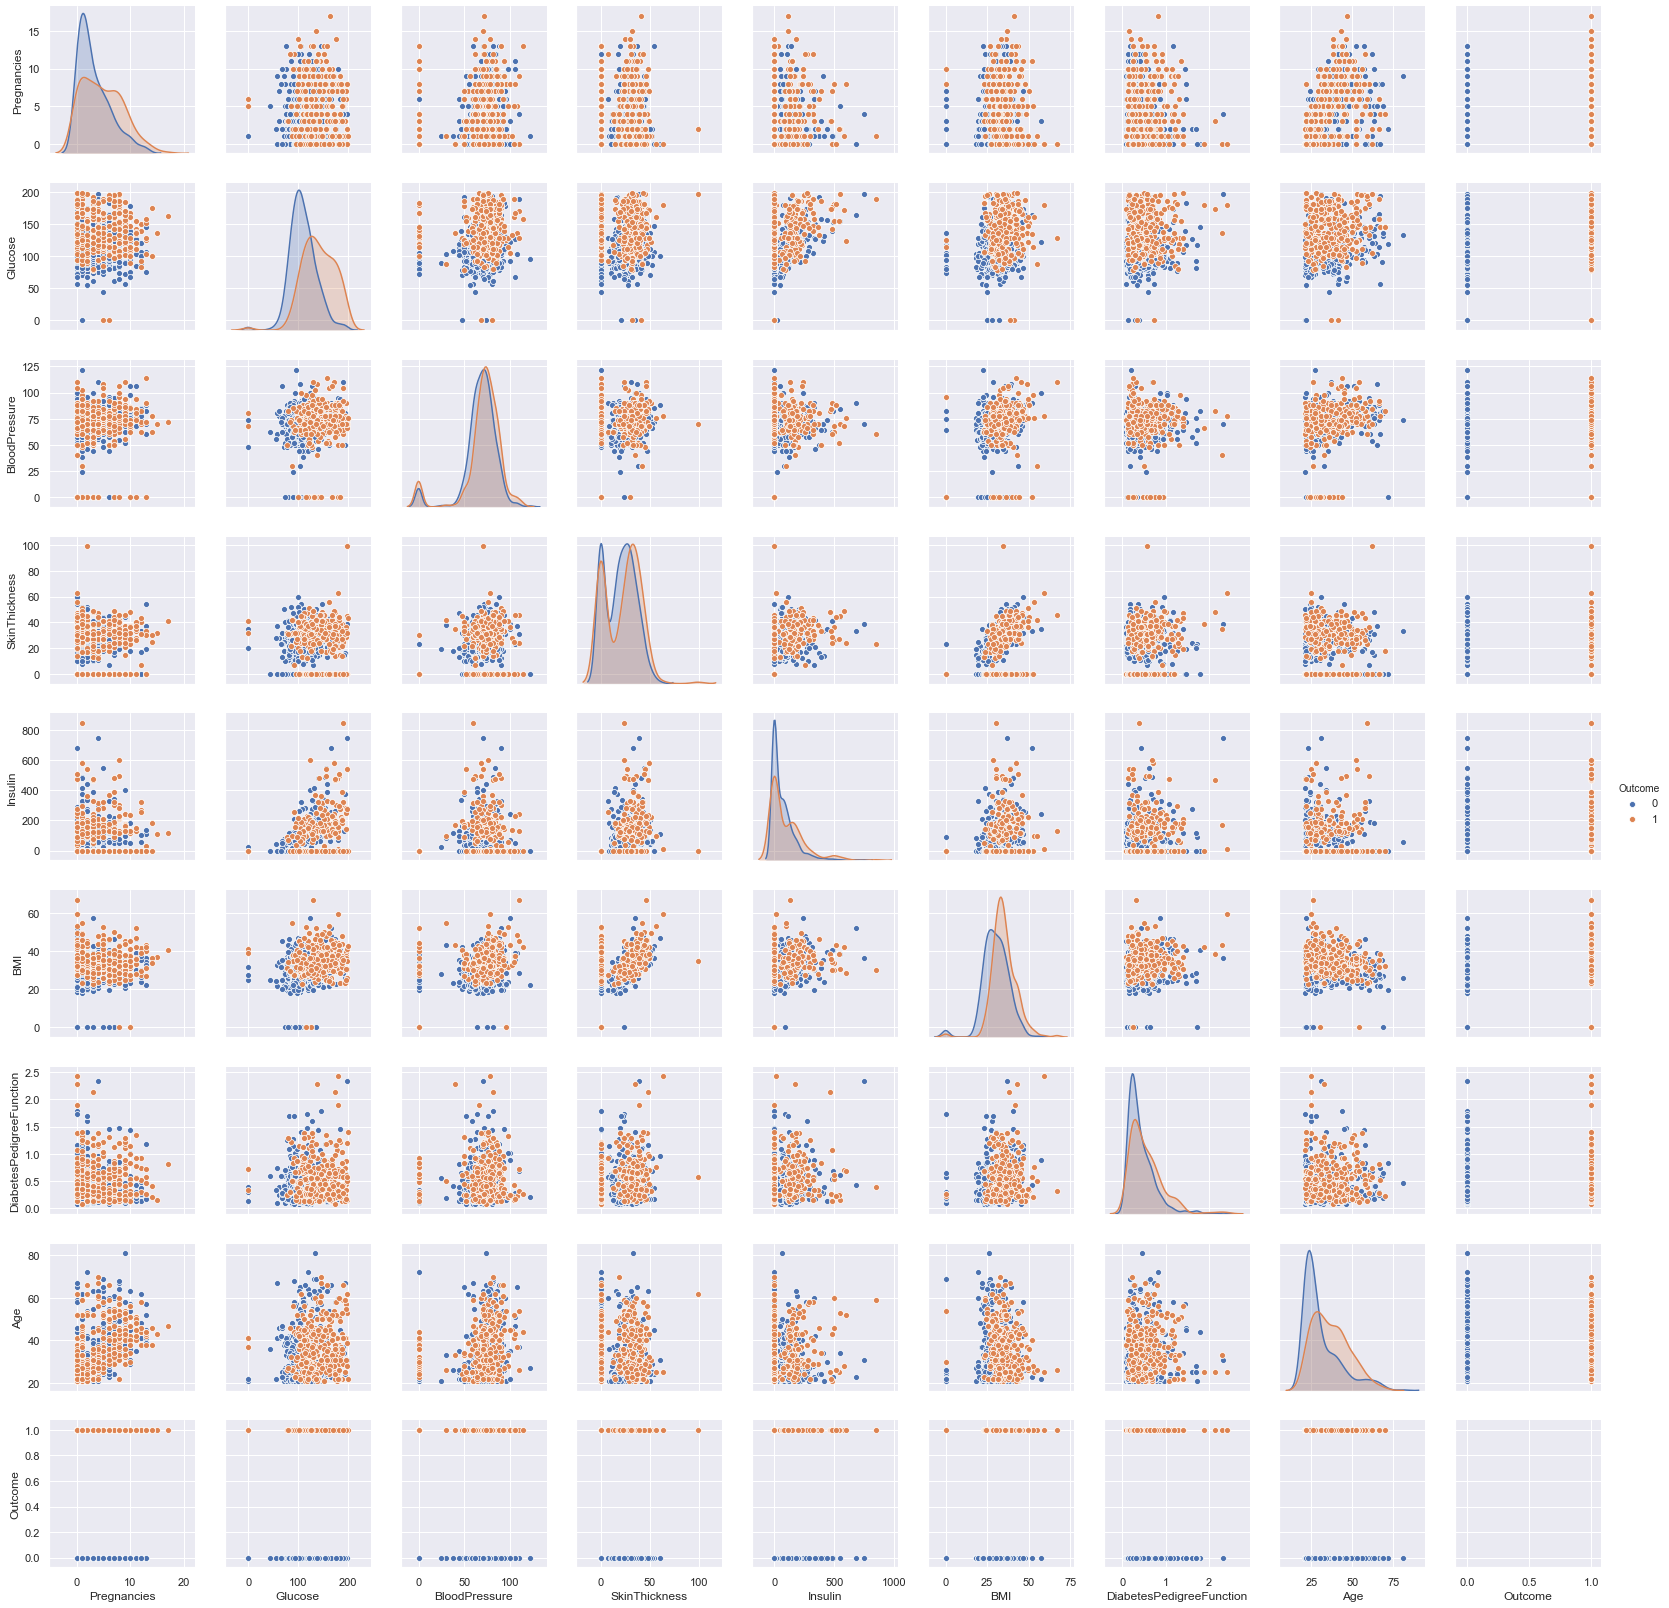

In [72]:
sns.pairplot(data,hue='Outcome')

This Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

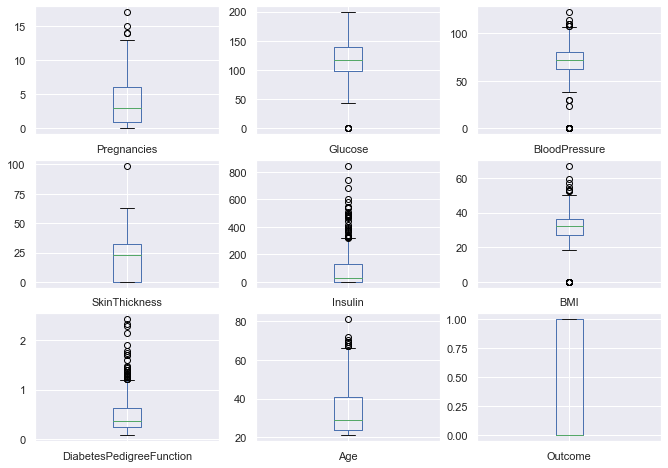

In [109]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

We can see that the spread of attributes is quite different. Some like age, test and skin
appear quite skewed towards smaller values

__Correlation and Scatter Plot Matrix__

Correlation the relationships to gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated

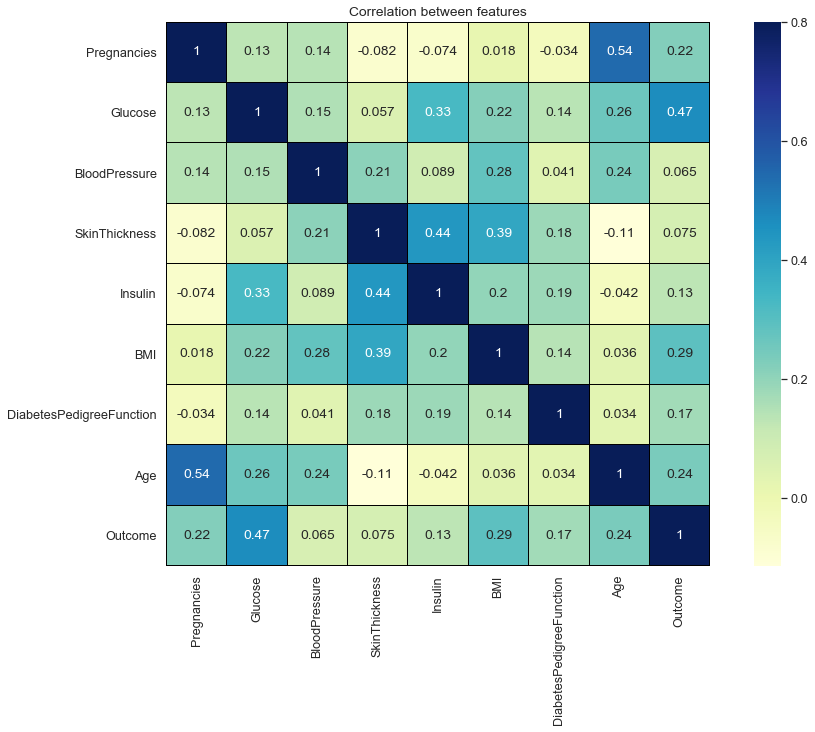

In [119]:
corr=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as
the top right. This is useful as we can see two different views on the same data in one plot. We
can also see that each variable is perfectly positively correlated with each other (as you would
have expected) in the diagonal line from top left to bottom right

Generating the plot, you can see that it gives the same information although making it a
little harder to see what attributes are correlated by name. Use this generic plot as a first cut to understand the correlations in your dataset and customize it like the first example in order
to read off more specific data if needed

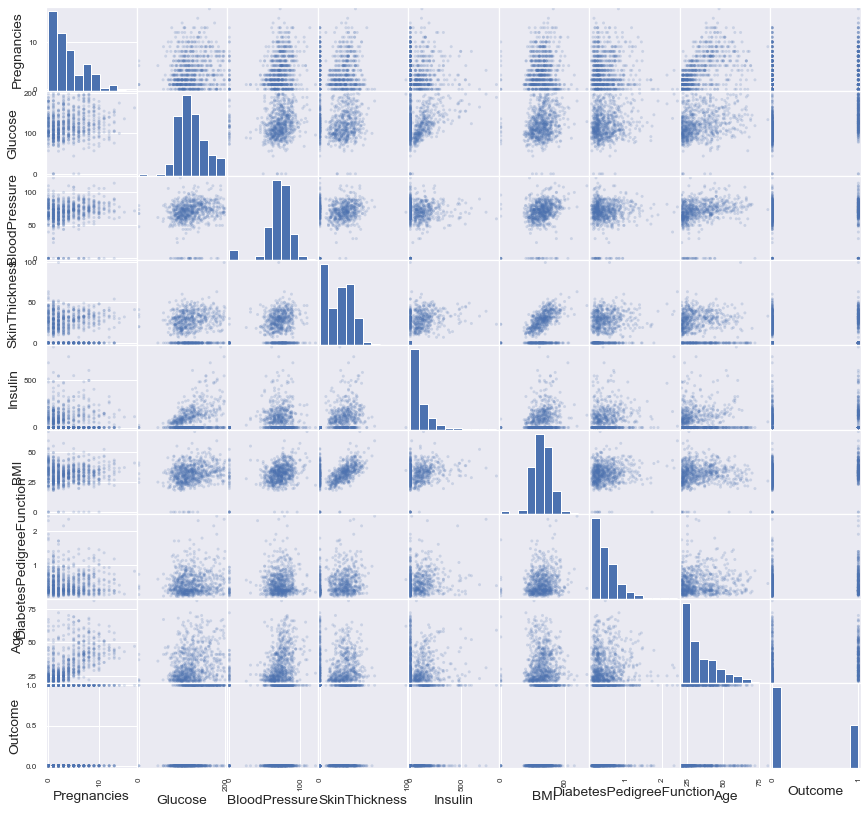

In [132]:
#plot scatter matrix
scatter_matrix(data, alpha=0.2, figsize=(13, 14))
plt.show()

Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. This is
useful to look at the pairwise relationships from different perspectives. Because there is little
point of drawing a scatter plot of each variable with itself, the diagonal shows histograms of
each attribute

# Preparing the Data For Machine Learning

__Data Pre-processing__

when you follow all of the rules and prepare your data, sometimes algorithms
can deliver better results without pre-processing.

__Data Transforms__

In [225]:
# Rescale data (between 0 and 1)
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
# separate array into input and output components
X = data.drop(['Outcome'],axis=1)
Y = data['Outcome']
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

After rescaling you can see that all of the values are in the range between 0 and 1

# Predictive Modeling

In [238]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

*****the results of Output of evaluating an algorithm with k-fold Cross Validation*****

LR: 0.773428 (0.055238)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.704340 (0.066647)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


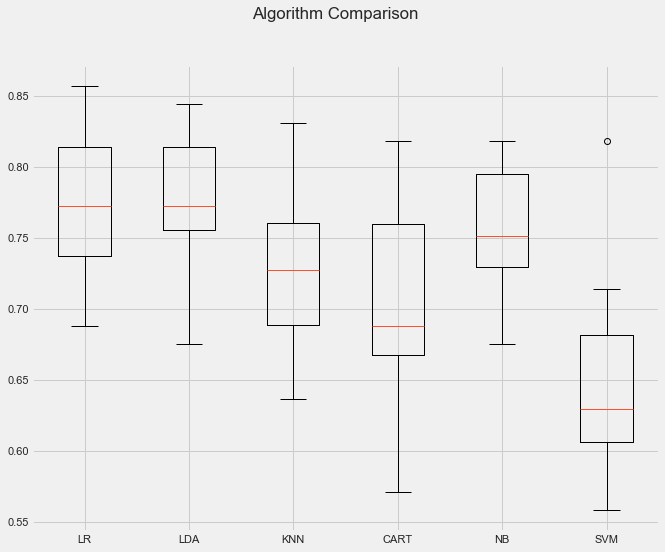

In [256]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
print('*****the results of Output of evaluating an algorithm with k-fold Cross Validation*****\n')
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

We can see that we report both the mean and the standard deviation of the performance measure. When summarizing performance measures, it is a good practice to summarize the distribution of the measures, in this case assuming a Gaussian distribution of performance (a very reasonable assumption) and recording the mean and standard deviation.